In [1]:
"""
Created on Wed Apr 20 14:39:43 2022

Example of Digit Recogniser.
Dataset: MNIST
Tools: Tensorflow and Keras
Classifier: Convolutional Neural Network.

@author: Shu-wei Huang
"""

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import keras as K

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

Using TensorFlow backend.
D:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

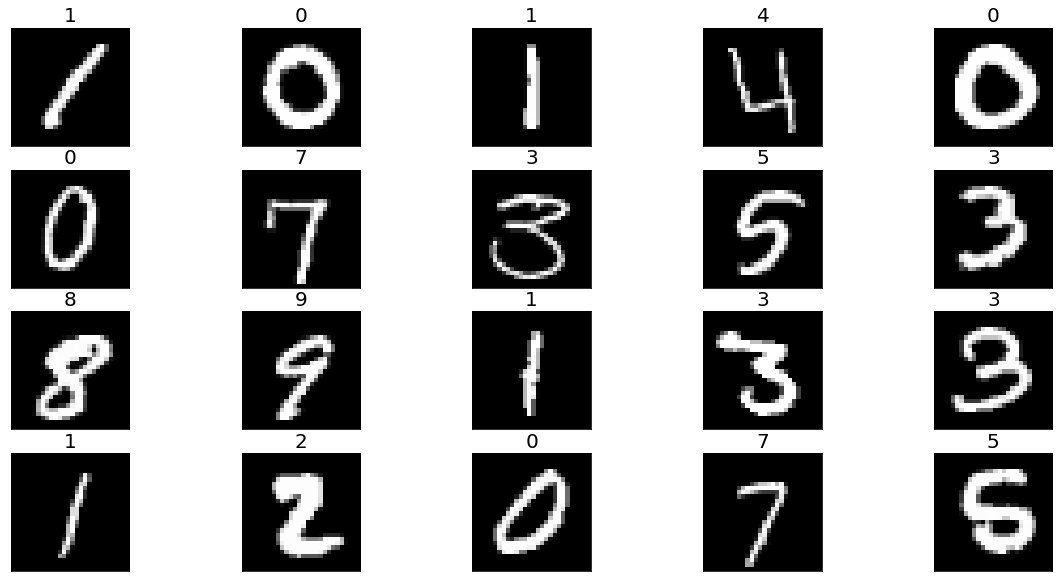

In [2]:
'''
Read data.
MNIST dataset.
'''
train = pd.read_csv('C:/Users/User/Desktop/Programming/Python/Data/digit-recognizer/train.csv')
Test = pd.read_csv('C:/Users/User/Desktop/Programming/Python/Data/digit-recognizer/test.csv')

train_y=train['label']
train_x=train.drop(labels = ["label"],axis = 1)

'''
Show a part of data.
'''
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    xx = train_x.iloc[i].to_numpy()
    plt.imshow(xx.reshape((28,28)), cmap='gray')
    plt.title(train_y[i],size = 20)

plt.show()

In [3]:

'''
Transform data variances to arrays.
'''
train_y = train_y.to_numpy()
train_x = train_x.to_numpy()/255
test = Test.to_numpy()/255

train_x, test_x, train_y, test_y = train_test_split(train_x, 
                                                    train_y, 
                                                    test_size = 0.3)

train_x, val_x, train_y, val_y = train_test_split(train_x, 
                                                    train_y, 
                                                    test_size = 0.3)

train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y)
val_y_true = val_y
val_y = np_utils.to_categorical(val_y)

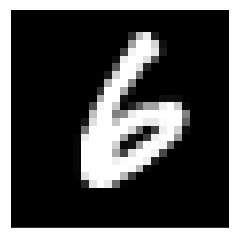

(20580, 28, 28, 1)


In [4]:
'''
Reshape data.
'''
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)
val_x = val_x.reshape(-1,28,28,1)

# show data
plt.imshow(train_x[15,0:28,0:28,0], cmap='gray')
plt.xticks(())
plt.yticks(())
plt.show()

in_shape = train_x.shape
print(in_shape)

In [5]:
'''
Built a model of Convolutional Neural Network.
'''
# network parameters
batch_size = 128
dropout = 0.5

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dense(batch_size, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
________________________________________________

In [6]:
# Compilation of model can be done
optimizer = K.optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(train_x, 
                    train_y, 
                    epochs=30, 
                    batch_size=batch_size)

# Evaluating model performance
loss, acc = model.evaluate(test_x, 
                           test_y, 
                           batch_size=batch_size)

print('\n\nLoss     : {} \nAccuracy : {}'.format(history.history['loss'][-1],history.history['accuracy'][-1]))

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
20580/20580 [==============================] - 9s 441us/step - loss: 0.4257 - accuracy: 0.8715
Epoch 2/30
20580/20580 [==============================] - 9s 438us/step - loss: 0.1421 - accuracy: 0.9576
Epoch 3/30
20580/20580 [==============================] - 9s 455us/step - loss: 0.1070 - accuracy: 0.9694
Epoch 4/30
20580/20580 [==============================] - 9s 456us/step - loss: 0.0911 - accuracy: 0.9721
Epoch 5/30
20580/20580 [==============================] - 11s 515us/step - loss: 0.0900 - accuracy: 0.9739
Epoch 6/30
20580/20580 [==============================] - 10s 507us/step - loss: 0.0787 - accuracy: 0.9763
Epoch 7/30
20580/20580 [==============================] - 10s 495us/step - loss: 0.0744 - accuracy: 0.9793
Epoch 8/30
20580/20580 [==============================] - 10s 497us/step - loss: 0.0765 - accuracy: 0.9765
Epoch 9/30
20580/20580 [==============================] - 10s 464us/step - loss: 0.0679 - accuracy: 

Validation Predictions


D:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


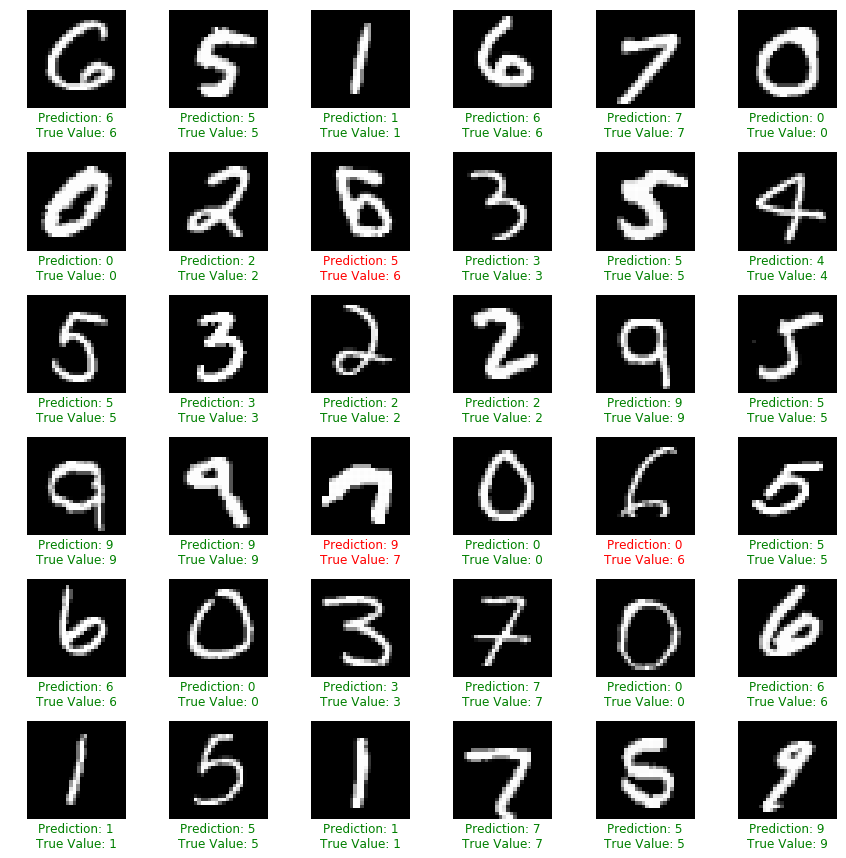

In [15]:
'''
Evaluate on validation data
'''
Y_pred = model.predict(val_x)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.array(val_y_true)
rows = 6
cols = 6
shift = 3600
f = plt.figure(figsize=(2*cols,2*rows))
print("Validation Predictions")
for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = val_x[i+shift]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    if Y_pred_classes[i+shift] != Y_true[i+shift]:
        plt.title("Prediction: {}\nTrue Value: {}".format(Y_pred_classes[i+shift], Y_true[i+shift]),
                  y=-0.35,color="red")
    else:
        plt.title("Prediction: {}\nTrue Value: {}".format(Y_pred_classes[i+shift], Y_true[i+shift]),
                  y=-0.35,color="green")
    
f.tight_layout()
f.show()

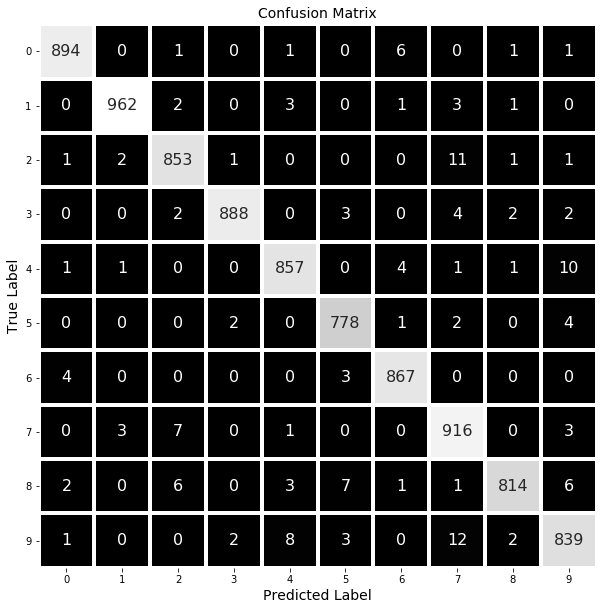

In [8]:
# Show confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=3,cmap="gray",
            fmt= '.0f',ax=ax,
            cbar = False,
           annot_kws={"size": 16})
plt.yticks(rotation = 0)
plt.xlabel("Predicted Label", size = 14)
plt.ylabel("True Label", size = 14)
plt.title("Confusion Matrix", size = 14)
plt.show()